## *Bo*Man26A NMR Data from TROSCY HSQC Measurements
# Introduction
<p> BoMan26A (pdb: 4ZXO) is a glycoside hydrolase (GH) from GH family 26 (GH26) originating from the human gut bacterium Bacteriocides ovatus. BoMan26A is of interest as it is upregulated in a Polysacharide Utilization Locus (PUL) in the presence of galactomannan, a dietary $\beta$-mannan (Bågenholm et al 2017). 

<p> In a previous study attempts at structural elucidation of BoMan26A using NMR succeeded in assigning 95% of the 344 backbone amide groups using a Transverse Relaxation Optimized (TROSY) Hetero-Nuclear Single Quantum Coherence (HSQC) experiment, suitable for larger proteins (~ <30kDa). 

<p> 10 of the residues were unassigned, where 8 of these were in “loop 8” (R314-K319, H322, Y327), a stretch of residues located near the active site -2 subsite. 

<p> The current theory is that the broadness of these peaks in the spectrum is caused by its large conformation ensemble caused by its flexibility. This flexibility in combination with its adjacency to the active site could indicate some functional role in substrate binding or catalysis, thus attempts to assign these peaks by repeating the experiments at lowered temperatures (15°C, 4°C).

In [1]:
# intialization
from utils.bruker_nmr_read import load_bruker, plot_2d_spectrum
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from Bio.SeqUtils import seq1

## Data Entry

In [2]:
"""
# Processed data from TopSpin
PATHS = [
        "/Users/simon/Library/CloudStorage/OneDrive-LundUniversity/BoMan26A NMR Project/nmr/BoMan26A_220519/2",
        "/Users/simon/Library/CloudStorage/OneDrive-LundUniversity/BoMan26A NMR Project/nmr/BoMan26A_220519/3",
        "/Users/simon/Library/CloudStorage/OneDrive-LundUniversity/BoMan26A NMR Project/nmr/BoMan26A_20220510/1",
        "/Users/simon/Library/CloudStorage/OneDrive-LundUniversity/BoMan26A NMR Project/nmr/GBG_TROSY_Wernersson2018/4",
    ]

NAMES = [
        "BoMan26A 15°C 220519", 
        "BoMan26A 4°C 220519",
        "BoMan26A 25°C 220510",
        "Wernersson et al 2018"
    ]

COLORS = [
        "blue",
        "red",
        "green",
        "purple"
    ]
"""

# Processed data from TopSpin
PATHS = [
        "/Users/simon/Library/CloudStorage/OneDrive-LundUniversity/BoMan26A NMR Project/nmr/BoMan26A_220519/3",
    ]

NAMES = [
         "BoMan26A 4°C 220519",
    ]

COLORS = [
          "red",
    ]

# Gather all data in large list of tuples
data_list = []
for i, PATH in enumerate(PATHS):
    data_list.append(load_bruker(PATH))

# split exp info and processed data into two lists
dics, datas = [], []
for spectrum in data_list:
    dics.append(spectrum[0])
    datas.append(spectrum[1])



function 'load_bruker' finished after 0.01s. 



/opt/homebrew/lib/python3.9/site-packages/nmrglue/fileio/convert.py:68: UserWarning: Incompatible dtypes, conversion not recommended
  warn("Incompatible dtypes, conversion not recommended")


In [3]:
# old spectrum from Wernersson et al
PATHS_1 = [
        "/Users/simon/Library/CloudStorage/OneDrive-LundUniversity/BoMan26A NMR Project/nmr/GBG_TROSY_Wernersson2018/4",
    ]

NAMES_1 = [
         "Wernersson et al 2018"
    ]

COLORS_1 = [
          "purple"
    ]

# Gather all data in large list of tuples
data_list_1 = []
for i, PATH in enumerate(PATHS_1):
    data_list_1.append(load_bruker(PATH))

# split exp info and processed data into two lists
dics_1, datas_1 = [], []
for spectrum in data_list_1:
    dics_1.append(spectrum[0])
    datas_1.append(spectrum[1])

function 'load_bruker' finished after 0.01s. 



## Plot of Spectra

In [4]:

# Plots
# plot style from R
plt.style.use("ggplot")

# create the figure
fig = plt.figure(figsize=[30, 20])
ax = fig.add_subplot(111)

plot_2d_spectrum(
    names=NAMES,
    dics=dics,
    datas=datas,
    channels=["\u03B4$^1H$", "\u03B4$^{15}N$"],
    xlim=[5, 11.5],
    ylim=[100, 135],
    contour_level_start=150_000_000,
    colors=COLORS,
    ax=ax,
)

plot_2d_spectrum(
    names=NAMES_1,
    dics=dics_1,
    datas=datas_1,
    channels=["\u03B4$^1H$", "\u03B4$^{15}N$"],
    xlim=[5, 11.5],
    ylim=[100, 135],
    contour_level_start=15_000,
    contour_factor=2.5,
    colors=COLORS_1,
    ax=ax,
)
plt.close()


/opt/homebrew/lib/python3.9/site-packages/numpy/ma/core.py:2826: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


Plotting spectrum in file: BoMan26A 4°C 220519
x-dim limits: 11.52, -2.13
y-dim limits: 136.00, 102.13
color: red


function 'plot_2d_spectrum' finished after 0.24s. 

Plotting spectrum in file: Wernersson et al 2018
x-dim limits: 11.68, -2.27
y-dim limits: 136.00, 102.13
color: purple


function 'plot_2d_spectrum' finished after 0.24s. 



## Assigned Backbone shifts from Wernersson et al 2018 in bmrb

     sequence chem_comp_ID  X_shift  Y_shift X_atom_name Y_atom_name
0          12          ARG    7.660  115.801           H           N
1          13          GLY    7.933  108.318           H           N
2          14          SER    8.209  116.234           H           N
3          15          GLY    8.430  111.425           H           N
4          16          GLU    8.203  120.990           H           N
..        ...          ...      ...      ...         ...         ...
310       352          PHE    7.408  119.890           H           N
311       353          GLU    8.212  121.736           H           N
312       354          LEU    8.808  121.652           H           N
313       355          TYR    8.032  114.203           H           N
314       356          LYS    7.003  123.464           H           N

[315 rows x 6 columns]


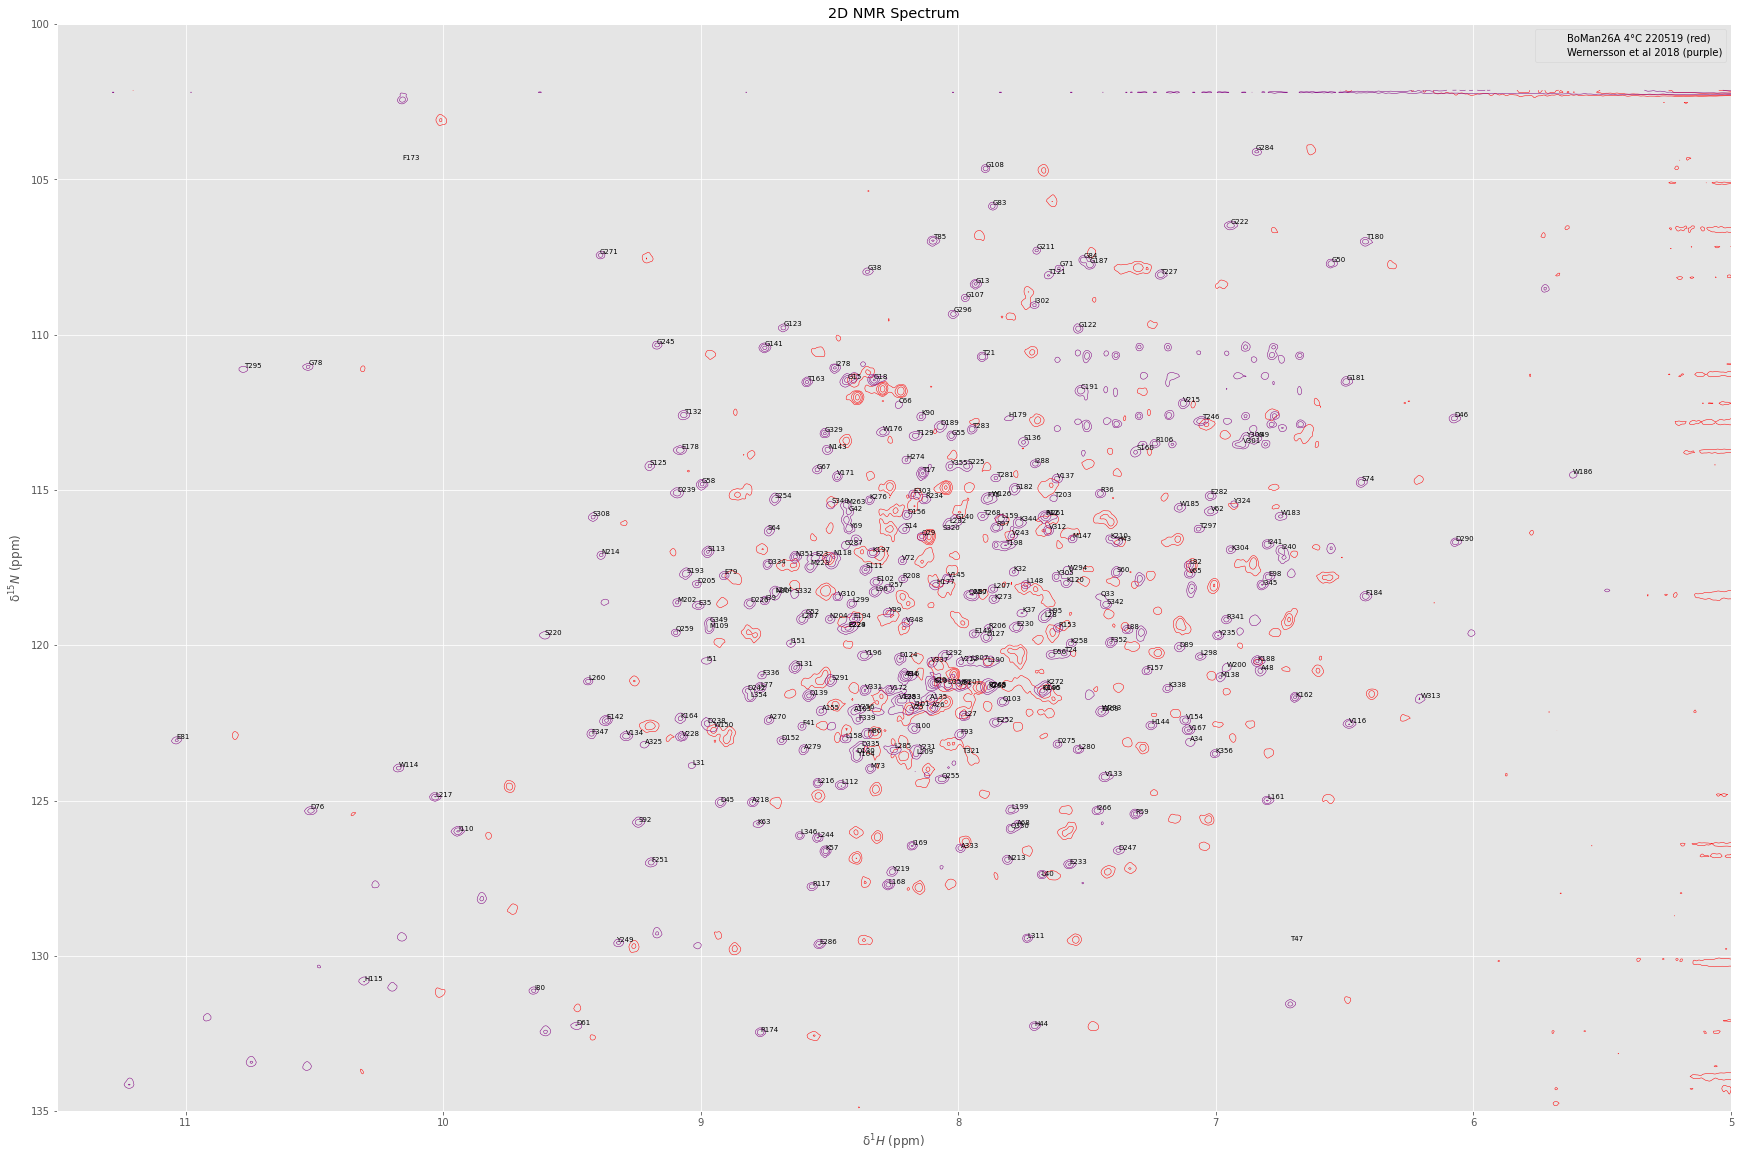

In [5]:
# Backbone assignments from brmb, deposited in Wernersson et al 2018
sim_HSQC_bb = pd.read_csv("/Users/simon/Library/CloudStorage/OneDrive-LundUniversity/BoMan26A NMR Project/bmrb deposited : simulated data/27691_simulated_hsqc_backbone.csv")

# print all simulated peaks
print(sim_HSQC_bb)

# get current figure and axis
plt.figure(fig.number)
plt.sca(ax)

# for each peak in the .csv file
for row in sim_HSQC_bb.iterrows():

    # plot all assigned peaks in Wernersson et al 2018 as black text, convert 3-letter AA code to 1-letter
    plt.text(
        row[1]["X_shift"],
        row[1]["Y_shift"],
        f"{seq1(seq = row[1]['chem_comp_ID'])}{row[1]['sequence']}",
        fontsize = 7
    )

# show the plot
plt.show()

## simulated backbone shifts from shiftx2

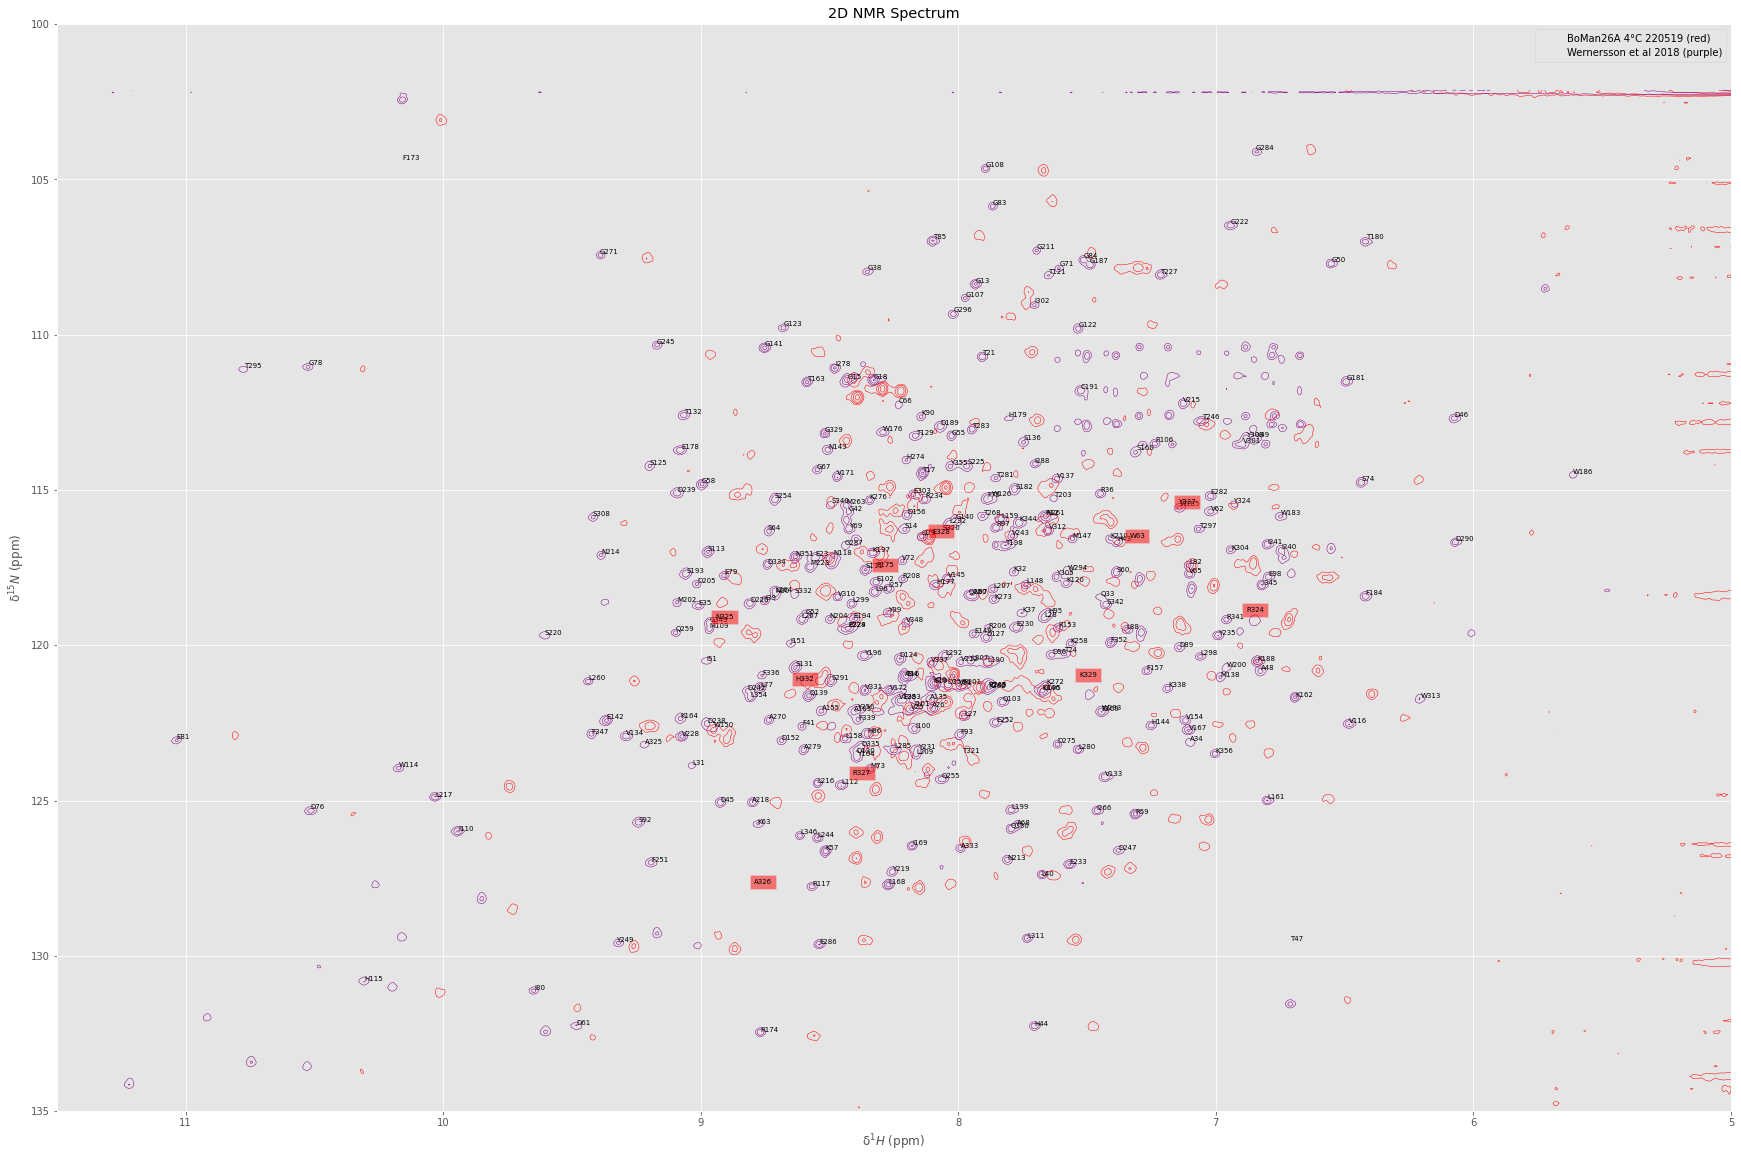

In [6]:
# these are the unassigned residues from Wernersson et al 2018
unassigned_res = {63: "TRP",
                  175:"GLU",
                  324:"ARG",
                  325:"ASN",
                  326:"ALA",
                  327:"ARG",
                  328:"GLU",
                  329:"LYS",
                  332:"HIS",
                  337:"Tyr",
            } 

# simulated backbone shifts of all atoms, done for BoMan26A 3D structure (pdb:4ZXO), using program "shiftx2"
shiftx2_HSQC_bb = pd.read_csv("/Users/simon/Library/CloudStorage/OneDrive-LundUniversity/BoMan26A NMR Project/shift predictions/shiftx2_bb_pred_220523.csv")

# collect all simulated shifts for unassigned N and H
#create empty dict of columns
df = {"residue":[],"\u03B41H":[],"\u03B415N":[]} 

# for each simulated shift:
for index,row in shiftx2_HSQC_bb.iterrows():

      # if the shift is one of the unassugned in Wernersson AND N or H:
      if row["NUM"] in unassigned_res.keys() and  row["ATOMNAME"] in ("H", "N"):

            # add current residue to dataframe
            df["residue"].append(f"{row['RES']}{row['NUM']}")

            # if its H add shift to H column, if its N, add shift to N column
            if row["ATOMNAME"] == "H":
                  df["\u03B41H"].append(row["SHIFT"])
            elif row["ATOMNAME"] == "N":
                  df["\u03B415N"].append(row["SHIFT"])

# cleanup: remove excess resiude codes due to sloppy code and convert to datafram for readability
df["residue"] = df["residue"][1::2]
df = pd.DataFrame(df)

# get current figure and axis
plt.figure(fig.number)
plt.sca(ax)

for index,row in df.iterrows():
    # plot all assigned peaks in Wernersson et al 2018 as black text, convert 3-letter AA code to 1-letter
    plt.text(
        row["\u03B41H"],
        row["\u03B415N"],
        row['residue'],
        fontsize = 7,
        bbox=dict(facecolor='red',
         alpha=0.5)
      )




## Discussion & Analysis

# Loop 8 annotation by lowering temperature (220519).
<p>

In [7]:
# get current figure and axis
plt.figure(fig.number)
plt.sca(ax)

# Save current figure
plt.savefig(fname = f'/Users/simon/Library/CloudStorage/OneDrive-LundUniversity/BoMan26A NMR Project/figures/BoMan26A_TROSCY_HSQC {str(date.today())}.pdf',
            dpi = 450,
            format = "pdf",
            facecolor = "white",
            transparent = False,
        )
plt.close()